In [53]:
import warnings
import pandas as pd
import numpy as np
import json
from textblob import TextBlob
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import geoplot as gplt
import descartes
from shapely.geometry import Point, Polygon

warnings.simplefilter('ignore')

In [4]:
df_review = pd.read_json('../Samples/reviews_sample.json')
df_business = pd.read_json("../Samples/business_sample.json")
df_review = df_review.rename(columns={'stars': 'rating'})

df_join = df_review[['business_id', 'text', 'rating']].join(df_business[['business_id', 'is_open', 'stars', 'latitude', 'longitude']].set_index('business_id'), on='business_id')

spatial_locations = df_join[['latitude', 'longitude']]
bounding_box = ((df_join.longitude.min(), df_join.longitude.max(), df.latitude.min(), df.latitude.max()))
print(bounding_box)


(-115.4775185511, -72.9449376777, 33.2048631082, 51.2963563)


(-125.13, -66.50, 25.04, 49.73)

In [14]:
usa = gpd.read_file('../states21basic/states.shp')

In [17]:
usa.head()

,drawseq,state_abbr,state_fips,state_name,sub_region,geometry
0,NaN,HI,15,Hawaii,Pacific,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,NaN,WA,53,Washington,Pacific,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,NaN,MT,30,Montana,Mountain,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,NaN,ME,23,Maine,New England,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,NaN,ND,38,North Dakota,West North Central,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


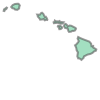

In [19]:
usa.loc[0, 'geometry']

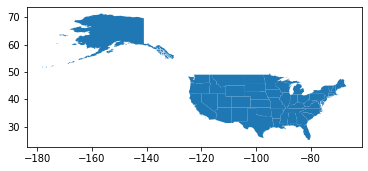

In [27]:
usa[usa.state_abbr != 'HI'].plot()

In [28]:
latlng = df_join[['latitude', 'longitude']]
gdf = gpd.GeoDataFrame(latlng, geometry=geopandas.points_from_xy(latlng.longitude, latlng.latitude))
print(gdf.head())

    latitude   longitude                     geometry
0  36.215546 -115.248798  POINT (-115.24880 36.21555)
1  33.259702 -111.790203  POINT (-111.79020 33.25970)
2  40.452180  -79.934234   POINT (-79.93423 40.45218)
3  36.127375 -115.224171  POINT (-115.22417 36.12737)
4  43.648404  -79.375469   POINT (-79.37547 43.64840)


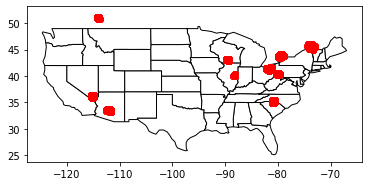

In [43]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# We restrict to South America.
ax = contiguous_usa.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [30]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


              business_id                             name  \
0  1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3  xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4  HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   

                          address         city state postal_code   latitude  \
0     2818 E Camino Acequia Drive      Phoenix    AZ       85016  33.522143   
1            30 Eglinton Avenue W  Mississauga    ON     L5R 3E7  43.605499   
2       10110 Johnston Rd, Ste 15    Charlotte    NC       28210  35.092564   
3   15655 W Roosevelt St, Ste 237     Goodyear    AZ       85338  33.455613   
4  4209 Stuart Andrew Blvd, Ste F    Charlotte    NC       28217  35.190012   

    longitude  stars  review_count  is_open  \
0 -112.018481    3.0             5        0   
1  -79.652289    2.5           128        1   
2  -80.8591

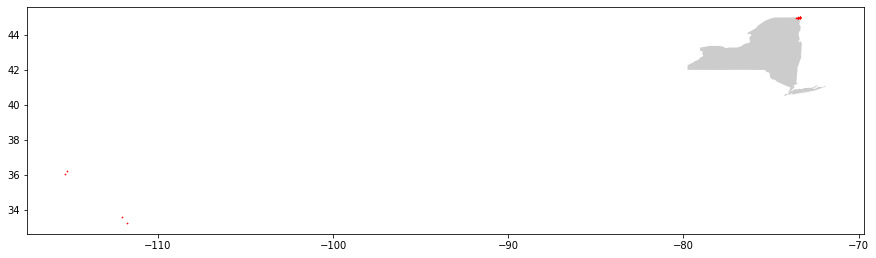

In [70]:
df_bus = pd.read_json('../yelp_dataset/business.json', lines=True)
print(df_bus.head())
df_NY = df_bus[df_bus['state']=='NY']


world = gpd.read_file('../states21basic/states.shp')
# crs = {'init': 'epsg:4326'}
# geometry = [Point(xy) for xy in zip(latlng.longitude, latlng.latitude)]

geo_df = gpd.GeoDataFrame(df_NY, geometry=geopandas.points_from_xy(df_NY.longitude, df_NY.latitude))
fig,ax = plt.subplots(figsize=(15,15))
# world.plot(ax=ax, alpha=0.4, color='grey')
world[usa.state_abbr == 'NY'].plot(ax=ax, alpha=0.4, color='grey')

geo_df.plot(ax=ax, markersize=0.5, color='red', marker='o')
# geo_df[geo_df['is_open'] == 0].plot(ax=ax, markersize=0.5, color='red', marker='o')
# geo_df[geo_df['is_open'] == 1].plot(ax=ax, markersize=0.5, color='green', marker='^')